# Haar Cascade Face Detector in OpenCV

In [79]:
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact
import time

%matplotlib inline

In [80]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [91]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('resources/haarcascade_frontalface_default.xml')
lbp_face_cascade = cv2.CascadeClassifier('resources/lbpcascade_frontalface.xml')

In [92]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()
    
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return img_copy

## Play with parameters

In [93]:
img = cv2.imread('images/Claudia_Pechstein_0005.jpg')

#conver image to RGB and show image
@interact(scaleF=(1.1,1.9,0.1), minNeighborsVal=(1,9,1))
def detect_haar(scaleF=1.5, minNeighborsVal=5):
    img_copy = img.copy()
    gray_img = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    print(type(img_copy))
    faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor = scaleF, minNeighbors=minNeighborsVal) #scaleFactor – Parameter specifying how much the image size is reduced at each image scale.
    #faces = lbp_face_cascade.detectMultiScale(gray_img, scaleFactor = scaleF, minNeighbors=minNeighborsVal)
   #go over list of faces and draw them as rectangles on original colored img
    for (x,y,w,h) in faces:
        cv2.rectangle(img_copy, (x,y), (x+w, y+h), (0, 255, 0), 2)
    
    plt.imshow(convertToRGB(img_copy))

interactive(children=(FloatSlider(value=1.5, description='scaleF', max=1.9, min=1.1), IntSlider(value=5, descr…

# HoG Face Detector in Dlib

In [84]:
import dlib
from skimage import io

In [85]:
def detect_hog_dlib(image):
    img_copy = image.copy()
    
    hogFaceDetector = dlib.get_frontal_face_detector()
    face_rects = list(hogFaceDetector(img_copy, 1))
    
    for k, d in enumerate(face_rects):
        cv2.rectangle(img_copy, (d.left(), d.top()), (d.right(), d.bottom()), (0, 255, 0), 2)
        
    return img_copy

In [86]:
from skimage import data, color, feature
import skimage.data

## Visualization of HOG features

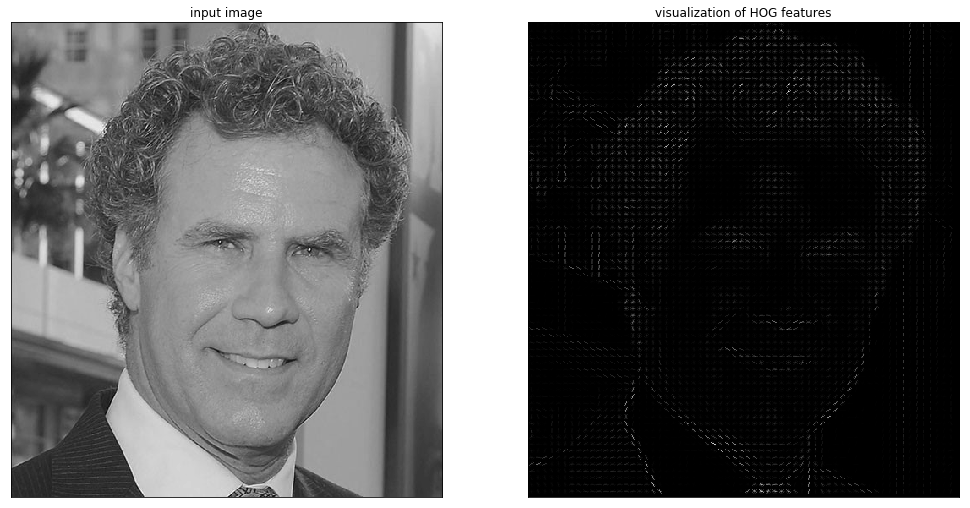

In [87]:
image = io.imread('images/men1.jpeg')

image_gray = color.rgb2gray(image)
hog_vec, hog_vis = feature.hog(image_gray, visualise=True)
fig, ax = plt.subplots(1, 2, figsize=(17, 9),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis, cmap='gray')
ax[1].set_title('visualization of HOG features');

# CNN Face Detector in Dlib

In [95]:
def detect_cnn_dlib(image):
    img_copy = image.copy()
    
    dnnFaceDetector = dlib.cnn_face_detection_model_v1("resources/mmod_human_face_detector.dat")
    faceRects = dnnFaceDetector(img_copy, 1)
    
    for k, d in enumerate(faceRects):
        cv2.rectangle(img_copy, (d.rect.left(), d.rect.top()), (d.rect.right(), d.rect.bottom()), (0, 255, 0), 2)

    return img_copy

# Test

In [96]:
image = io.imread('images/people.jpg')

#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, image)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1

#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, image)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1

#------------HoG-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
hog_detected_img = detect_hog_dlib(image)

#note time after detection
t2 = time.time()
#calculate time difference
dt3 = t2 - t1

#------------CNN-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
cnn_detected_img = detect_cnn_dlib(image)

#note time after detection
t2 = time.time()
#calculate time difference
dt4 = t2 - t1

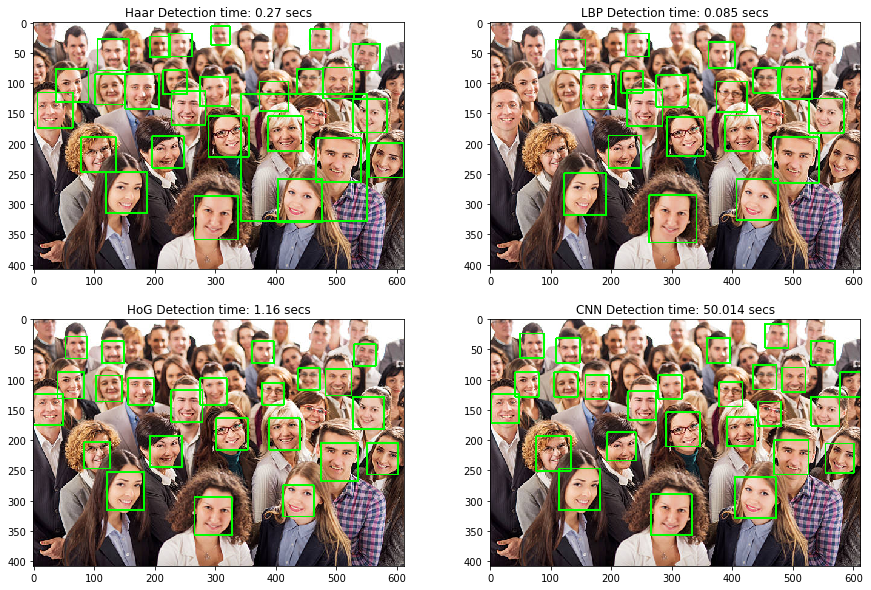

In [90]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(haar_detected_img)

#show Haar image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(lbp_detected_img)

#show HOG image
ax3.set_title('HoG Detection time: ' + str(round(dt3, 3)) + ' secs')
ax3.imshow(hog_detected_img)

#show CNN image
ax4.set_title('CNN Detection time: ' + str(round(dt4, 3)) + ' secs')
ax4.imshow(cnn_detected_img)